# Tensor Basics
Install required packages
- torch
- torchvision
- tensorboard
- matplotlib
- tensorboardX

In [26]:
import torch

In python, there is NumPy (vectors and arrays), but in Pytorch, there is Tensor that can be 1D, 2D or 3D.

In [3]:
x = torch.empty(1) #1D scalable tensor, value is not initialised
print(x)

tensor([1.1210e-44])


In [4]:
x = torch.empty(3) #1D tensor of vector with 3 elements 
print(x)

tensor([2.5902e-09, 7.0065e-44, 0.0000e+00])


In [5]:
x = torch.empty(2, 3) #2D tensor of matrix 2 by 3
print(x)

tensor([[2.1765e-04, 1.0072e-11, 2.7082e+23],
        [8.1721e+20, 3.2768e-09, 2.5808e-06]])


In [6]:
x = torch.empty(2, 2, 3) #3D tensor of matrix 3 by 3
print(x)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [7]:
x = torch.zeros(2,2) #2D tensor of zero matrix
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [8]:
x = torch.rand(2,2) #2D tensor of random matrix
print(x)

tensor([[0.4546, 0.4453],
        [0.9365, 0.2263]])


In [9]:
x = torch.ones(2,2) #2D tensor of ones matrix
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [10]:
#change to integer type
x = torch.ones(2,2, dtype=torch.int) 
print(x.dtype)

torch.int32


In [11]:
#change to double type
x = torch.ones(2,2, dtype=torch.double) 
print(x.dtype)

torch.float64


In [12]:
#change to float16 type
x = torch.ones(2,2, dtype=torch.float16)
print(x.dtype) #check type
print(x.size()) #check size

torch.float16
torch.Size([2, 2])


In [13]:
#create tensor manually
x = torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [17]:
#adding tensors
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y #torch.add(x,y) #z.add_(1)
print(z)

tensor([[0.3069, 0.1628],
        [0.3432, 0.9342]])
tensor([[0.4507, 0.4825],
        [0.0354, 0.9603]])
tensor([[0.7577, 0.6453],
        [0.3786, 1.8946]])


In [19]:
#other operations
subs = torch.sub(x,y)
mul = torch.mul(x,y)
div = torch.div(x,y)

In [20]:
#print subset
x = torch.rand(5,3)
print(x[:,0])

tensor([0.4851, 0.3074, 0.5085, 0.5987, 0.8701])


In [22]:
#extract item from tensor
x = torch.rand(5,3)
print(x)
print(x[1,1].item())

tensor([[0.7145, 0.7492, 0.3513],
        [0.5081, 0.0550, 0.4921],
        [0.6761, 0.9686, 0.6465],
        [0.9665, 0.5925, 0.3426],
        [0.2512, 0.1271, 0.1460]])
0.05500805377960205


In [25]:
#flatten tensor
x = torch.rand(4,4)
print(x)
y = x.view(16) #flatten to 16 per row
print(y)
z = x.view(-1,8) #flatten to 8 per row
print(z)

tensor([[0.6690, 0.0836, 0.6169, 0.1214],
        [0.8569, 0.9857, 0.1034, 0.9691],
        [0.1243, 0.3099, 0.8783, 0.1471],
        [0.1310, 0.1904, 0.8883, 0.3208]])
tensor([0.6690, 0.0836, 0.6169, 0.1214, 0.8569, 0.9857, 0.1034, 0.9691, 0.1243,
        0.3099, 0.8783, 0.1471, 0.1310, 0.1904, 0.8883, 0.3208])
tensor([[0.6690, 0.0836, 0.6169, 0.1214, 0.8569, 0.9857, 0.1034, 0.9691],
        [0.1243, 0.3099, 0.8783, 0.1471, 0.1310, 0.1904, 0.8883, 0.3208]])


In [30]:
#convert tensor to numpy array
import numpy as np

a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [32]:
#convert numpy array to tensor
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a+=1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [33]:
#operate the operation in GPU (CUDA)
if torch.cuda.is_available(): #mac does not have CUDA
    device = torch.device("cuda") #specify cuda computing
    x = torch.ones(5, device=device) #create tensor, and put it in GPU
    y = torch.ones(5)
    y = y.to(device) #other way to put in GPU
    z = x + y #operation is done in GPU (faster!)
    
    #z.numpy() #can't do this because numpy operates in CPU only
    z = z.to("cpu") #convert to cpu from gpu CUDA

In [34]:
#specify grad to track all operations
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# AutoGrad
Calculate gradient to optimise (autograph packages)

Forward phase: calculate output y, store function automatically (grad_fn) <br>
Backward phase: calculate gradient by taking partial derivative of grad_fn
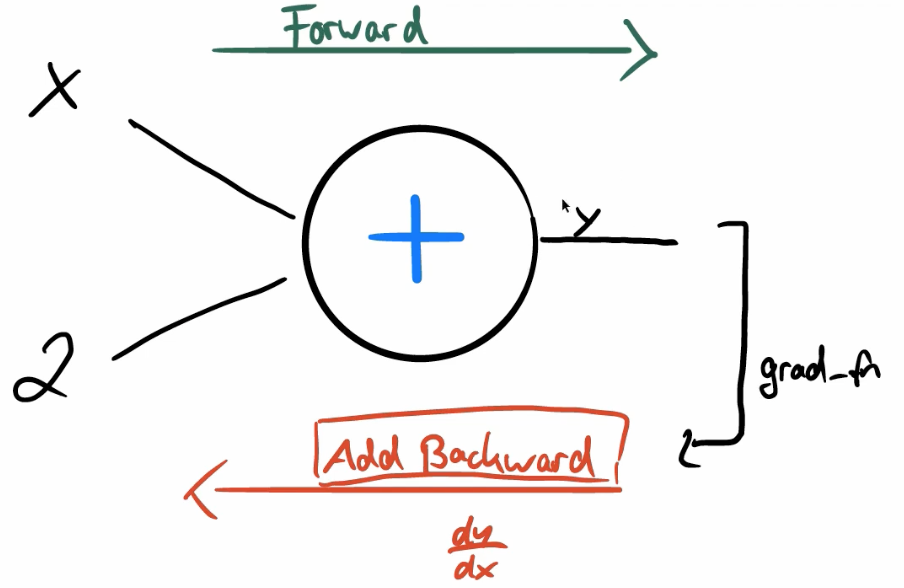

In [56]:
# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True)
print(x)

tensor([0.0836, 0.1004, 0.2610], requires_grad=True)


In [57]:
y = x+2
print(y) #AddBackwards - addition with backward propagation

tensor([2.0836, 2.1004, 2.2610], grad_fn=<AddBackward0>)


In [58]:
z = y*y*2
z = z.mean()
print(z) #MeanBackwards - mean with backward propagation

tensor(9.2436, grad_fn=<MeanBackward0>)


In [59]:
# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # x variable before has -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([0.0836, 0.1004, 0.2610], requires_grad=True)
tensor([2.0836, 2.1004, 2.2610], grad_fn=<AddBackward0>)


In [60]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([13.0244, 13.2352, 15.3365], grad_fn=<MulBackward0>)
tensor(13.8654, grad_fn=<MeanBackward0>)


In [61]:
# COMPUTE the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function - the tensor
z.backward() # dz/dx, must be in scalar
print(x.grad) # store all backward gradients

tensor([4.1672, 4.2008, 4.5220])


Backward propagation (tuning each weight layer to minimise the loss function) creates vector Jacobian product to get the gradients. <br>
Jacobian matrix with partial derivatives * Gradient vector = Final gradient vector (chain rule)
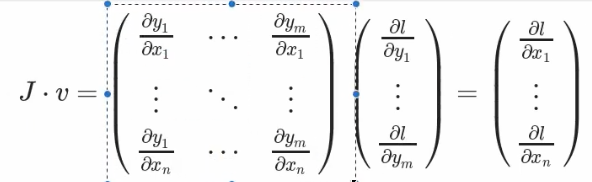

In [66]:
# Model with non-scalar output:
# If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() 
# specify a gradient argument that is a tensor of matching shape.
# needed for vector-Jacobian product
x = torch.randn(3, requires_grad=True)
y = x+2
z = y*y*2
print(z.shape)
#z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32) #because size is 3
z.backward(v) #dz/dx
print(x.grad)

torch.Size([3])
tensor([6.7304e-01, 8.0438e+00, 5.0133e-03])


In [67]:
# Stop a tensor from tracking history: (remove gradient functions - 3 ways)
# For example during our training loop when we want to update our weights
# then these update operation variables should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

In [68]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
None
True


In [69]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

True
False


In [70]:
# wrap in 'with torch.no_grad():' to remove gradient function
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

True
False


In [71]:
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3): #training loop
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward() #calculate gradients, and keep accumulating if without zero
    
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    # without this, it becomes 3. --> 6. --> 9. through iteration
    weights.grad.zero_()

print(weights)
print(model_output)

# Optimizer also has zero_grad() method
# optimizer = torch.optim.SGD([weights], lr=0.1) #applying stochastic gradient descent
# During training:
# optimizer.step()
# optimizer.zero_grad() #same as previous one

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


# Backpropagation
__Chain rule__ <br>
Function processes input to give output in a chain, then compute derivatives in backward projection.
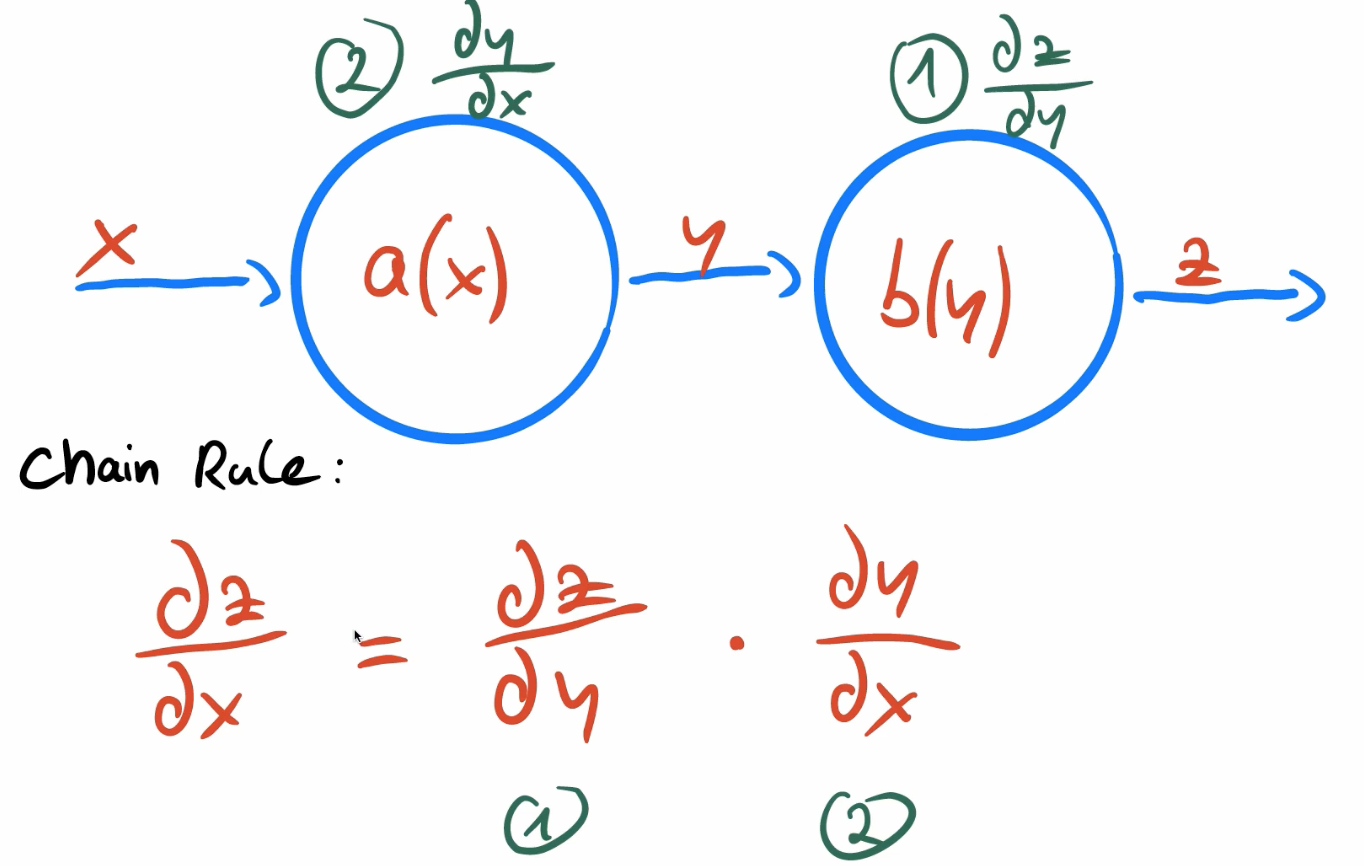

__Computational graph__ <br>
Calculate local gradient in the operation. Then calculate loss function that we want to minimise.
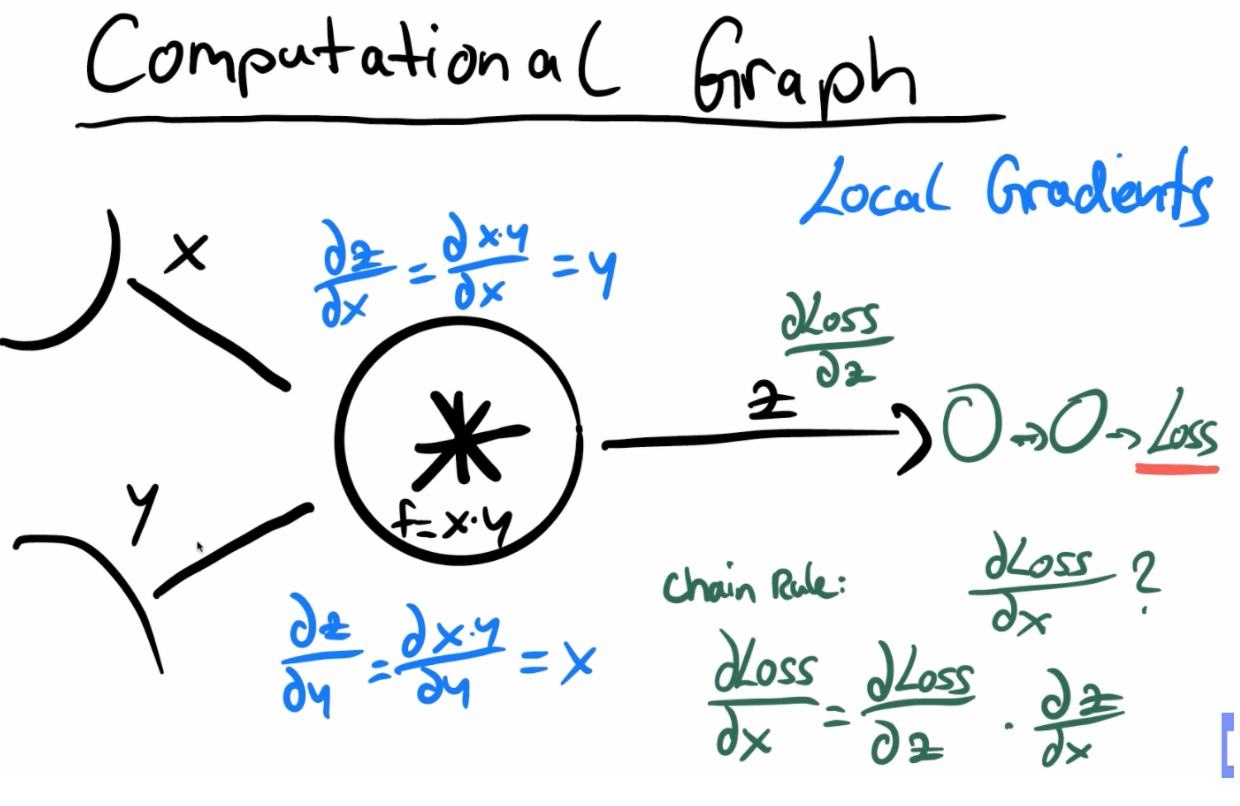

__Three steps:__
- Forward pass: Compute loss (GREEN)
- Compute local gradients (BLUE)
- Backward pass: Compute dLoss/dWeights using the chain rule (RED)

Example: using Linear regression <br>
predicted y is y^ and real y is y
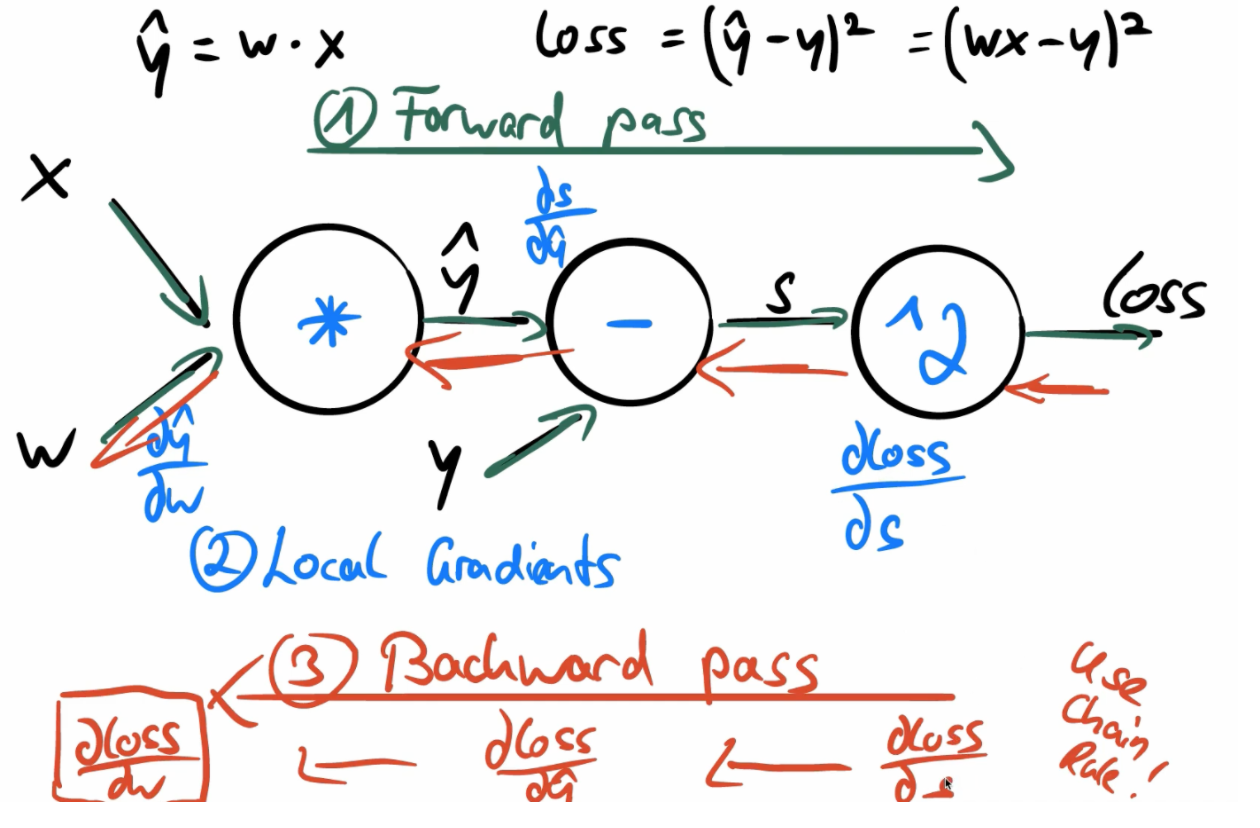

Example with values: <br>
x and y are fixed so no need to compute local gradients, only compute on the updated variables such as w (weights)
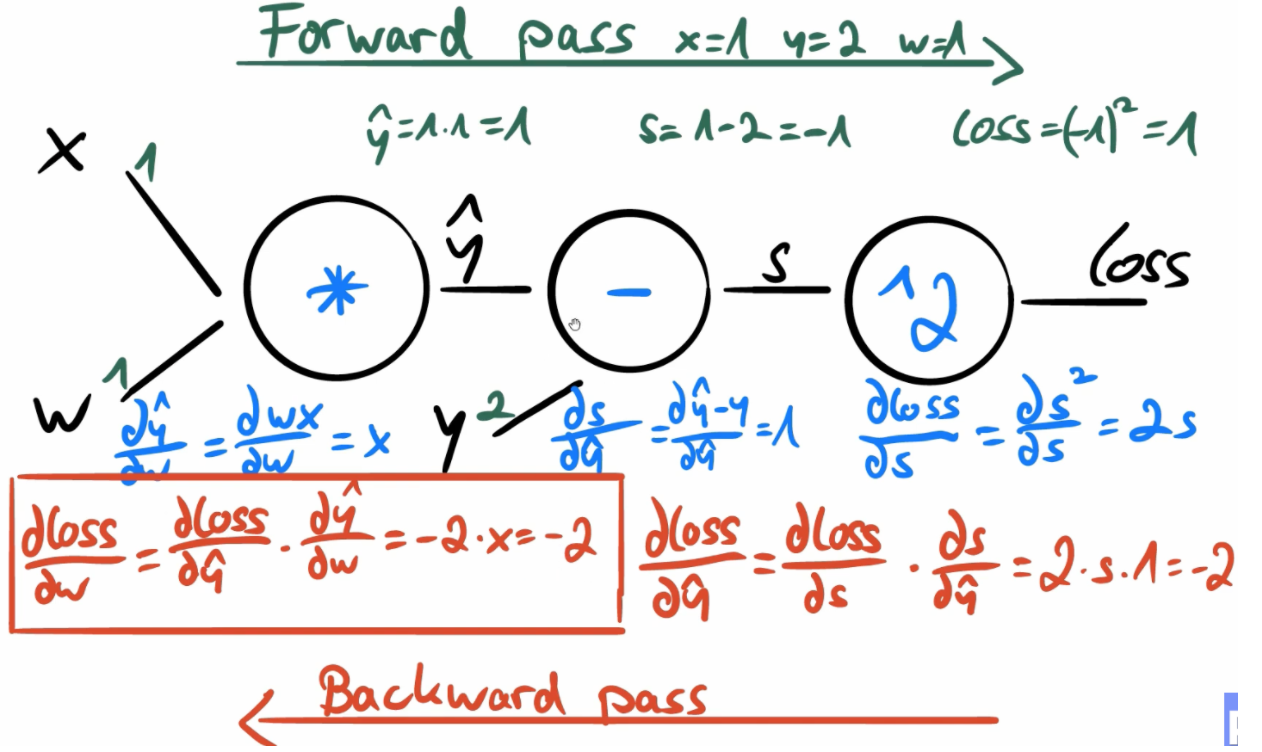



In [73]:
# replicate example below
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass... (iteration, not added here)

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

# Gradient Descent using Autograd

Optimising model - (Manual)
- Prediction: use equation to calculate model prediction (manually)
- Gradients computation (manually)
- Loss computation (manually)
- Parameters updates: apply gradient secent algorithm

Optimising model - (Automatic)
- Prediction: use equation to calculate model prediction (PyTorch Model)
- Gradients computation (Autograd)
- Loss computation (PyTorch Loss)
- Parameters updates: apply gradient descent algorithm (PyTorch Optimiser)


__1 This section applies Optimising model by:__
- Prediction: use equation to calculate model prediction (Manual)
- Gradients computation (Manual)
- Loss computation (Manual)
- Parameters updates: apply gradient descent algorithm (Manual)

_Applying linear regression and gradient descent algorithm_

In [84]:
import numpy as np 

# Compute every step manually

# Linear regression
# f = w * x 

# here : f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32) #multiply by 2

w = 0.0 #initialise weight

# (calculate model prediction)
# model output 
def forward(x):
    return w * x

# (calculate loss)
# loss = MSE 
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# (calculate gradients)
# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}') #3dp, w*x

# Training
# define parameters
learning_rate = 0.01
n_iters = 20

# define training loop
for epoch in range(n_iters):
    # calculate predict = forward pass
    y_pred = forward(X)

    # calculate loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')

# Explanation: Prediction at epoch 20, w=2 & x=5, hence 2*5=10
# as epoch increases, weight increases to 2, loss decreases to 0

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


__2 This section applies Optimising model by:__
- Prediction: use equation to calculate model prediction (Manual)
- Gradients computation (Autograd)
- Loss computation (Manual)
- Parameters updates: apply gradient descent algorithm (Manual)

In [88]:
import torch

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
# Change from numpy to tensor (X,Y,w)
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    # Change to backward function, dl/dw
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


__3 This section applies Optimising model by:__
- Prediction: use equation to calculate model prediction (Manual)
- Gradients computation (Autograd)
- Loss computation (PyTorch Loss)
- Parameters updates: apply gradient descent algorithm (PyTorch Optimiser)

In [90]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn #neural network module

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
# Change to add loss and optimiser from PyTorch
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # Change to add optimiser steps
    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward>)
epoch  91 : w = 

__4 This section applies Optimising model by:__
- Prediction: use equation to calculate model prediction (PyTorch Model)
- Gradients computation (Autograd)
- Loss computation (PyTorch Loss)
- Parameters updates: apply gradient descent algorithm (PyTorch Optimiser)

In [92]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
# Change to reshape X and Y
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# Change to remove weights
n_samples, n_features = X.shape #extract the shape, samples=4, features=1
print(f'#samples: {n_samples}, #features: {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#Explanation: final result is not great, may need to change learning rate and optimiser model

#samples: 4, #features: 1
Prediction before training: f(5) = -3.849
epoch  1 : w =  -0.25846049189567566  loss =  tensor(60.0031, grad_fn=<MseLossBackward>)
epoch  11 : w =  1.5193442106246948  loss =  tensor(1.5804, grad_fn=<MseLossBackward>)
epoch  21 : w =  1.808769702911377  loss =  tensor(0.0672, grad_fn=<MseLossBackward>)
epoch  31 : w =  1.8586883544921875  loss =  tensor(0.0265, grad_fn=<MseLossBackward>)
epoch  41 : w =  1.869983434677124  loss =  tensor(0.0240, grad_fn=<MseLossBackward>)
epoch  51 : w =  1.8749693632125854  loss =  tensor(0.0226, grad_fn=<MseLossBackward>)
epoch  61 : w =  1.8788467645645142  loss =  tensor(0.0213, grad_fn=<MseLossBackward>)
epoch  71 : w =  1.8824551105499268  loss =  tensor(0.0201, grad_fn=<MseLossBackward>)
epoch  81 : w =  1.8859320878982544  loss =  tensor(0.0189, grad_fn=<MseLossBackward>)
epoch  91 : w =  1.889302372932434  loss =  tensor(0.0178, grad_fn=<MseLossBackward>)
Prediction after training: f(5) = 9.778


__Add more linear layers in Example 4 (Custom linear regression model)__

In [93]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
# Change to reshape X and Y
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# Change to remove weights
n_samples, n_features = X.shape #extract the shape, samples=4, features=1
print(f'#samples: {n_samples}, #features: {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

# TO ADD MORE LAYERS
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = 0.933
epoch  1 : w =  0.5326329469680786  loss =  tensor(25.9166, grad_fn=<MseLossBackward>)
epoch  11 : w =  1.7006131410598755  loss =  tensor(0.6787, grad_fn=<MseLossBackward>)
epoch  21 : w =  1.8903532028198242  loss =  tensor(0.0252, grad_fn=<MseLossBackward>)
epoch  31 : w =  1.9226889610290527  loss =  tensor(0.0079, grad_fn=<MseLossBackward>)
epoch  41 : w =  1.9296528100967407  loss =  tensor(0.0070, grad_fn=<MseLossBackward>)
epoch  51 : w =  1.9324836730957031  loss =  tensor(0.0066, grad_fn=<MseLossBackward>)
epoch  61 : w =  1.9345990419387817  loss =  tensor(0.0062, grad_fn=<MseLossBackward>)
epoch  71 : w =  1.936550498008728  loss =  tensor(0.0058, grad_fn=<MseLossBackward>)
epoch  81 : w =  1.9384279251098633  loss =  tensor(0.0055, grad_fn=<MseLossBackward>)
epoch  91 : w =  1.9402471780776978  loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
Prediction after training: f(5) = 9.880


# Linear Regression

epoch: 10, loss = 4084.0259
epoch: 20, loss = 2877.4170
epoch: 30, loss = 2054.9226
epoch: 40, loss = 1494.1425
epoch: 50, loss = 1111.7202
epoch: 60, loss = 850.8751
epoch: 70, loss = 672.9199
epoch: 80, loss = 551.4907
epoch: 90, loss = 468.6165
epoch: 100, loss = 412.0449


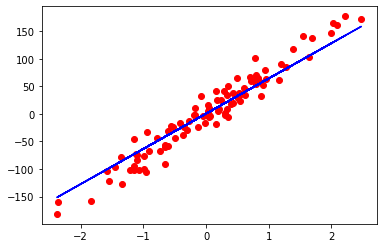

In [94]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
# load pre made data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshape y tensor

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) #one layer only

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
# get predicted value using final model, detach tensors to set required_grads=False, convert to numpy
predicted = model(X).detach().numpy()

# check the accuracy between predicted values and real values
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Logistic regression

In [95]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #scale features
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer() # load premade data
X, y = bc.data, bc.target # separate dataset 

n_samples, n_features = X.shape

# split data to train (80%) and test (20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale data
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert data to float data type
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape datasets
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b -> linear combination of weights & biases, then sigmoid at the end
#
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # define 1 built-in layer, input features are 30, output 1 feature (Class-labelled)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) # forward pass using sigmoid function
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss() #binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train) #compare to get loss

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step, avoiding sum up gradients in grad function
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# evaluate model (do not include computational graph - tracking history)
with torch.no_grad():
    y_predicted = model(X_test) #if <0.5 is class 1, otherwise class 2
    y_predicted_cls = y_predicted.round()
    # get accuracy, sum up if predicted is correct (same as true value)
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

#Nb: if accuracy in not perfect, can alter epoch number, optimiser etc.

epoch: 10, loss = 0.4641
epoch: 20, loss = 0.4002
epoch: 30, loss = 0.3560
epoch: 40, loss = 0.3235
epoch: 50, loss = 0.2985
epoch: 60, loss = 0.2787
epoch: 70, loss = 0.2624
epoch: 80, loss = 0.2488
epoch: 90, loss = 0.2372
epoch: 100, loss = 0.2272
accuracy: 0.9035


# Dataset and Dataloader

In [98]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math



# data = numpy.loadtxt('wine.csv')
# --> use Dataset and Dataloader to load wine.csv

# 1
# This takes large computation
# # training loop
# for epoch in range(1000):
#     x, y = data
#     # forward + backward + weight updates

# 2
# Large sample requires large computational power, 
# hence easier to divide them into smaller batches
# (gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches)
# # training loop
# for epoch in range(1000):
#     # loop over all batches
#     for i in range(total_batches):
#         x_batch, y_batch = ...

# Definition
# epoch = 1 forward and backward pass of ALL training samples
# batch_size = number of training samples in one forward and backward pass
# number of iterations = number of passes, each pass using [batch_size] number of samples
# e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [106]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        # load data
        xy = np.loadtxt('./data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0] #get number of samples

        # (slice data) here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features] 
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] # return tuple

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)


# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next() #move to next sample (batch_size = 4)
features, labels = data
print(features, labels)


# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) #iteration is counted based on batch_size
print(total_samples, n_iterations) # this gives 178, 45

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader): #unpack
        
        #
        # here supposed to be steps for forward, backward, update
        #
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

      

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.4830e+01, 1.6400e+00, 2.1700e+00, 1.4000e+01, 9.7000e+01, 2.8000e+00,
         2.9800e+00, 2.9000e-01, 1.9800e+00, 5.2000e+00, 1.0800e+00, 2.8500e+00,
         1.0450e+03],
        [1.3050e+01, 2.0500e+00, 3.2200e+00, 2.5000e+01, 1.2400e+02, 2.6300e+00,
         2.6800e+00, 4.7000e-01, 1.9200e+00, 3.5800e+00, 1.1300e+00, 3.2000e+00,
         8.3000e+02],
        [1.4060e+01, 2.1500e+00, 2.6100e+00, 1.7600e+01, 1.2100e+02, 2.6000e+00,
         2.5100e+00, 3.1000e-01, 1.2500e+00, 5.0500e+00, 1.0600e+00, 3.5800e+00,
         1.2950e+03],
        [1.2210e+01, 1.1900e+00, 1.7500e+00, 1.6800e+01, 1.5100e+02, 1.8500e+00,
         1.2800e+00, 1.4000e-01, 2.5000e+00, 2.8500e+00, 1.2800e+00, 3.0700e+00,
         7.1800e+02]]) tensor([[1.],
        [1.],
        [1.],
        [2.]])
178 45
Epoch

In [107]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

# Here we use MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/tommybillywijaya/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/tommybillywijaya/anaconda3/lib/

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/Users/tommybillywijaya/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370126481/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
torch.Size([3, 1, 28, 28]) torch.Size([3])


# Dataset Transform

In [110]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet
complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

# copy from previous custom class wine dataset (to load, index)
# now add transform arguments
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        # add transform argument
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index] #store tuple

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample): #callable object
        inputs, targets = sample #unpack sample
        return torch.from_numpy(inputs), torch.from_numpy(targets) #return tuple

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset() #or dataset = WineDataset(transform=None)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(3)]) # apply multiple transforms, give factor=3
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([4.2690e+01, 5.1300e+00, 7.2900e+00, 4.6800e+01, 3.8100e+02, 8.4000e+00,
        9.1800e+00, 8.4000e-01, 6.8700e+00, 1.6920e+01, 3.1200e+00, 1.1760e+01,
        3.1950e+03]) tensor([1.])


# Softmax and Crossentropy

## Softmax
- Apply exponential function, squeeze output to between 0 and 1 (proability)
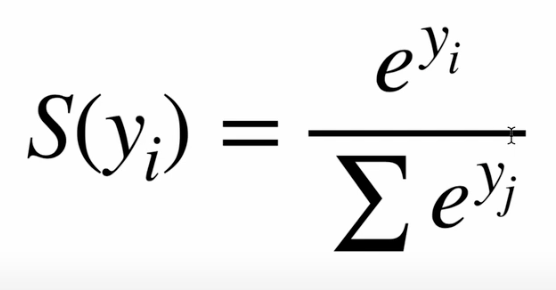
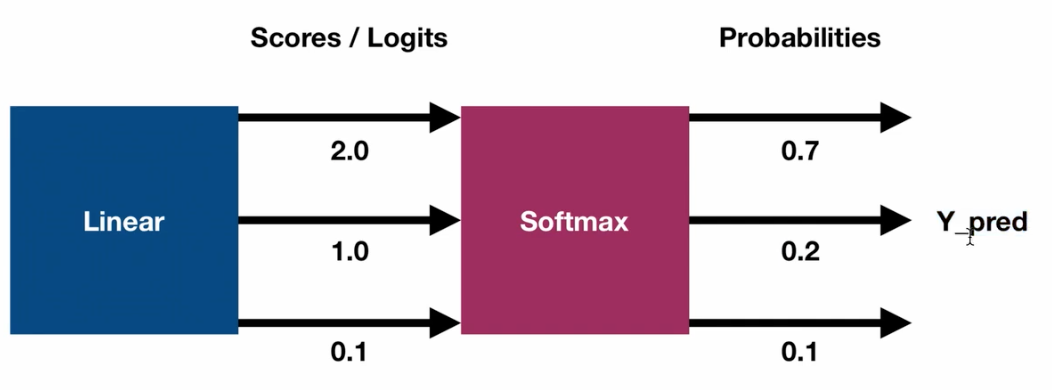

In [112]:
import torch
import torch.nn as nn
import numpy as np

#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

#highest value gives highest probability

x = np.array([2.0, 1.0, 0.1]) 
outputs = softmax(x)
print('softmax numpy:', outputs)

# convert to tensors
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis, dim=0 means first axis
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


## SoftMax and Crossentropy Loss
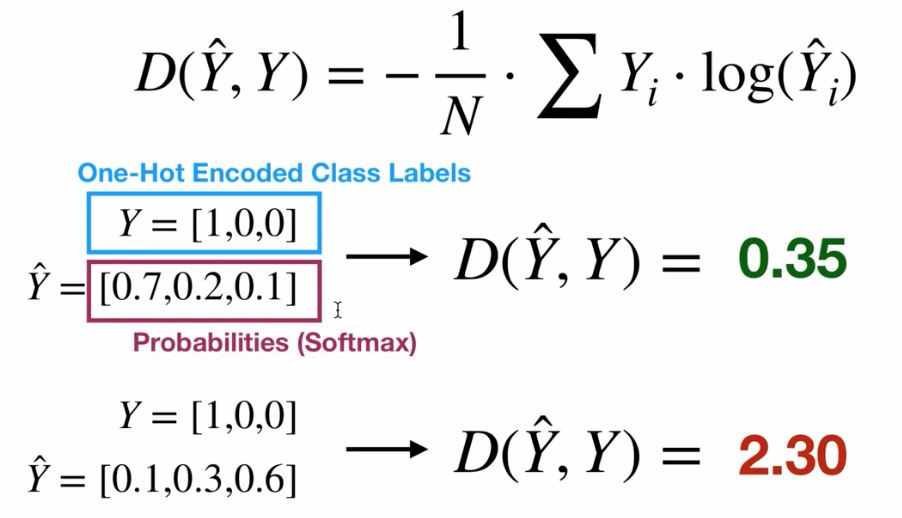
- Loss increases as prediction diverges away from true value.
- True Y has One-Hot Encoded Class Labels (where True is 1)
- Predicted Y has Probabilties (Softmax)

In [114]:
# Cross entropy - Manual
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    # calculate loss
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

# y prediction must be probabilities (we made these predictions)
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


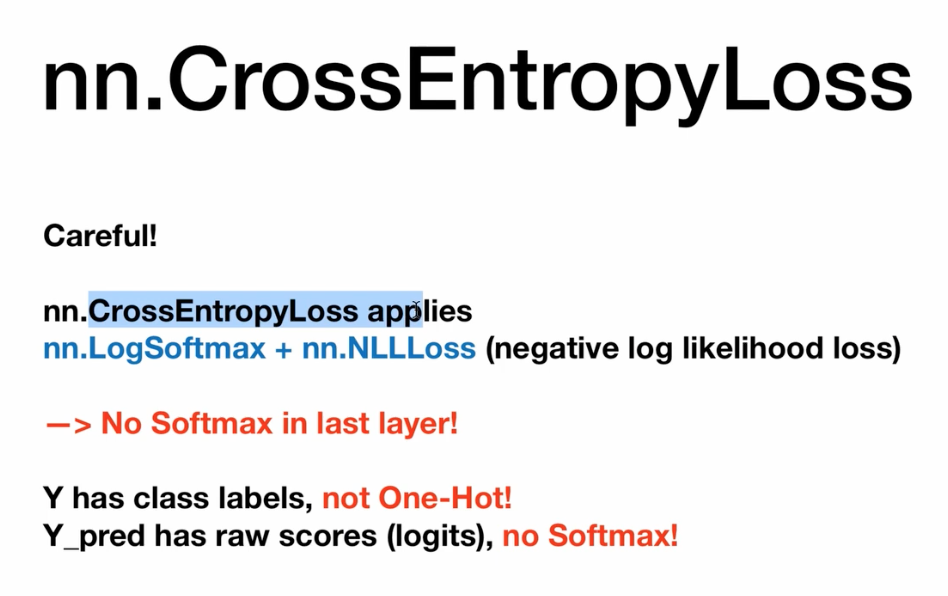

In [116]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
# compute losses
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')


# get predictions
_, predictions1 = torch.max(Y_pred_good, 1) # output: tensor([0]), 0 index is highest prediction
_, predictions2 = torch.max(Y_pred_bad, 1) # tensor([1]), 1 index is highest prediction
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [ ]:
# Example of 3 samples
# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')


## Neural network with SoftMax
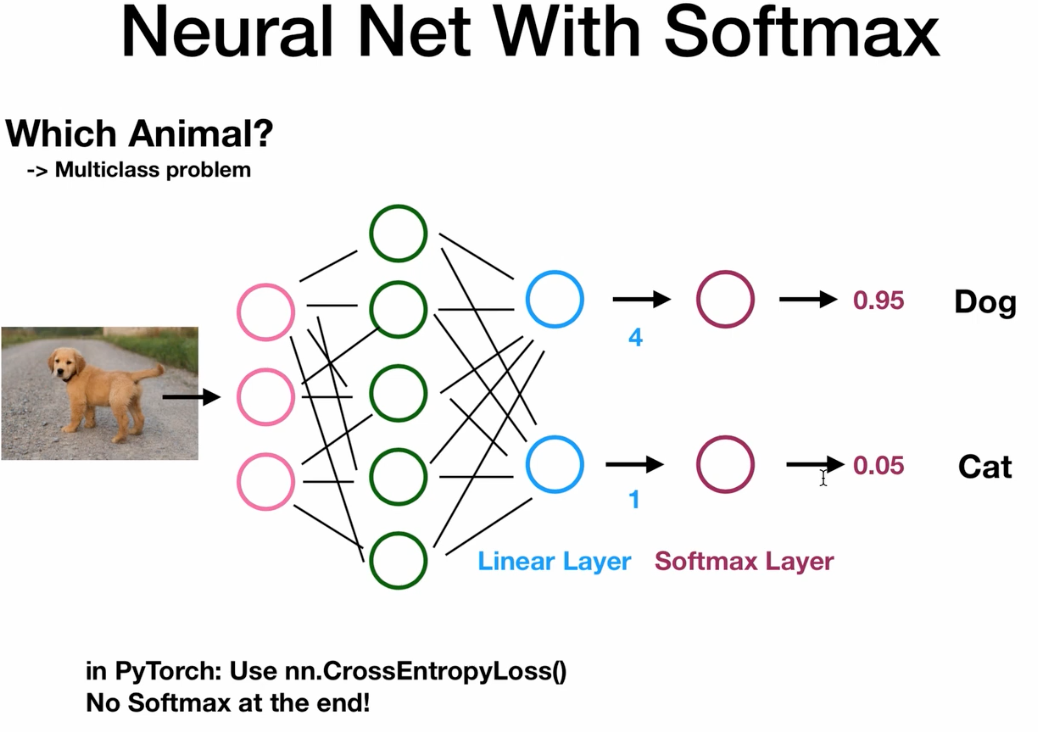
- input layer, hidden layer, linear layer (one output for each class), then apply softmax to get probability

In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) # linear layer
        self.relu = nn.ReLU() # hidden layer
        self.linear2 = nn.Linear(hidden_size, num_classes) # linear output layer
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

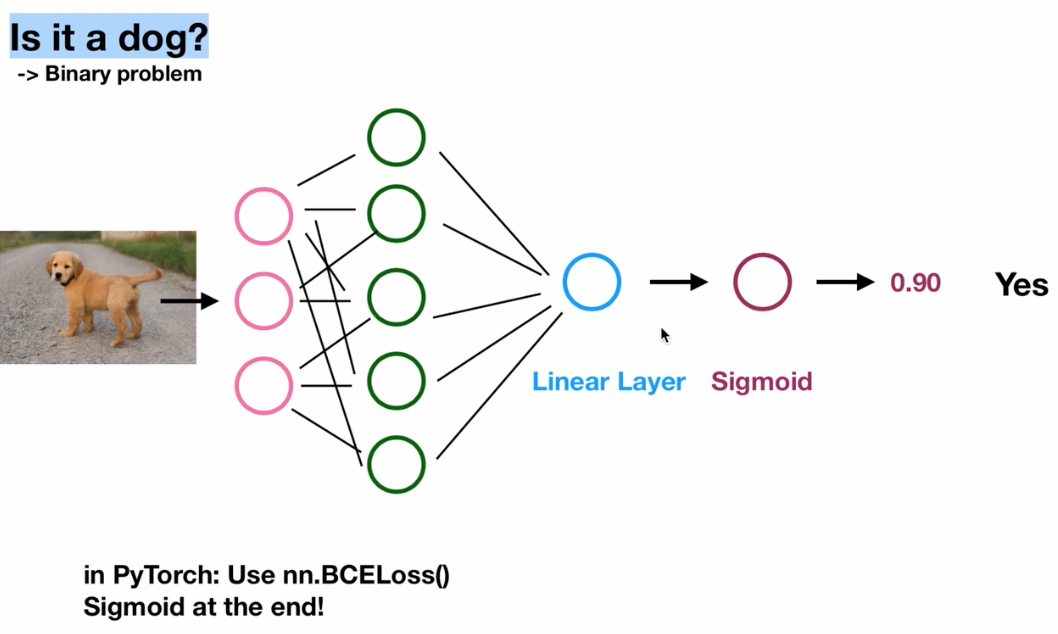

In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end  # no softmax
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() #Binary entropycross loss

# Activation Functions
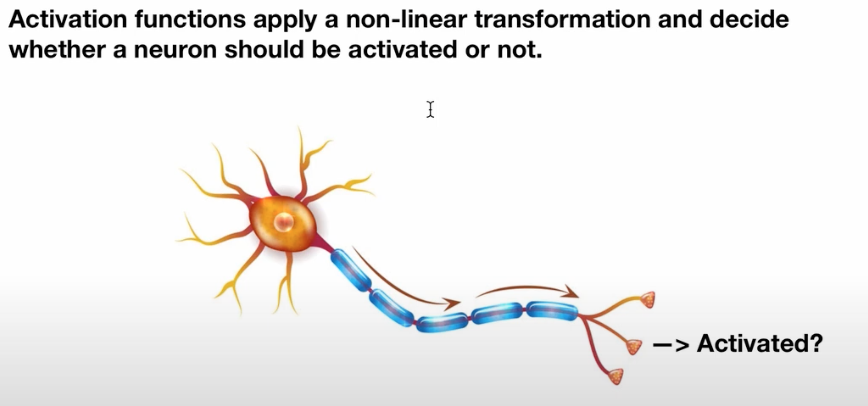
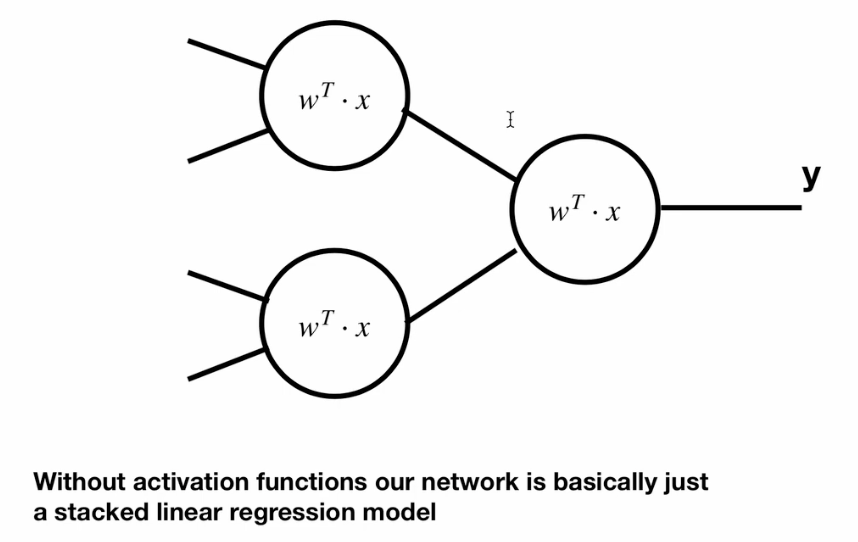
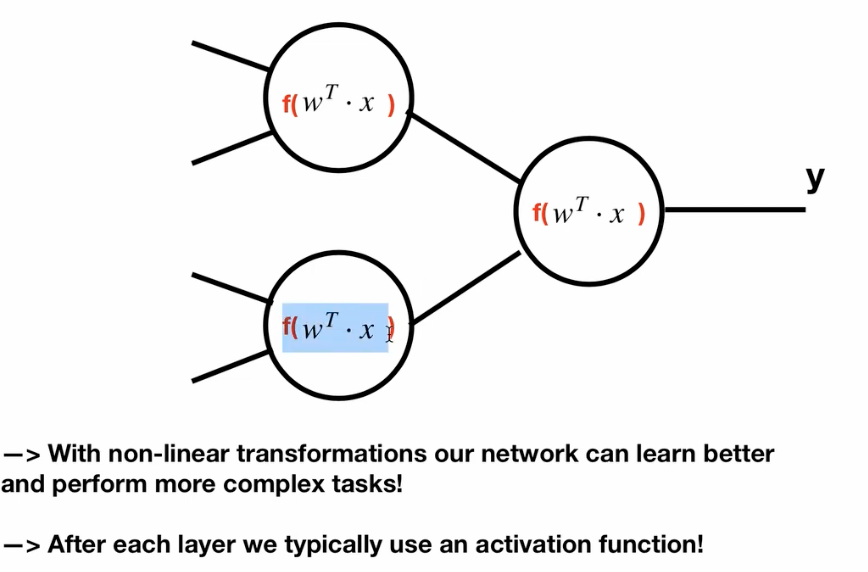
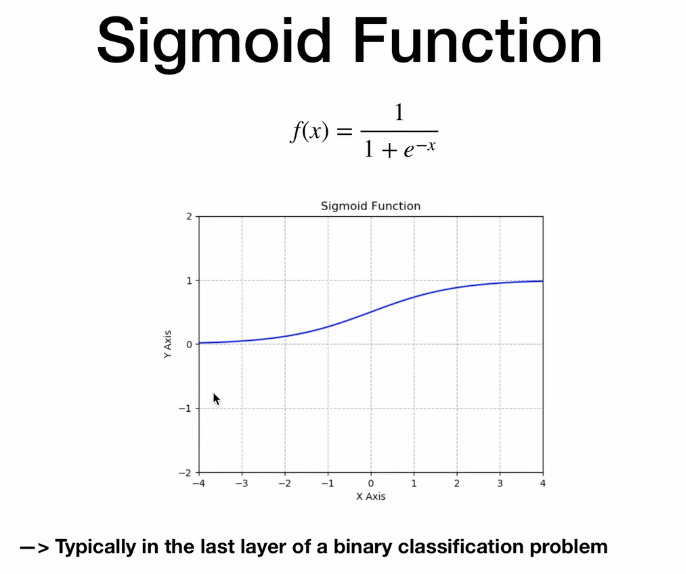
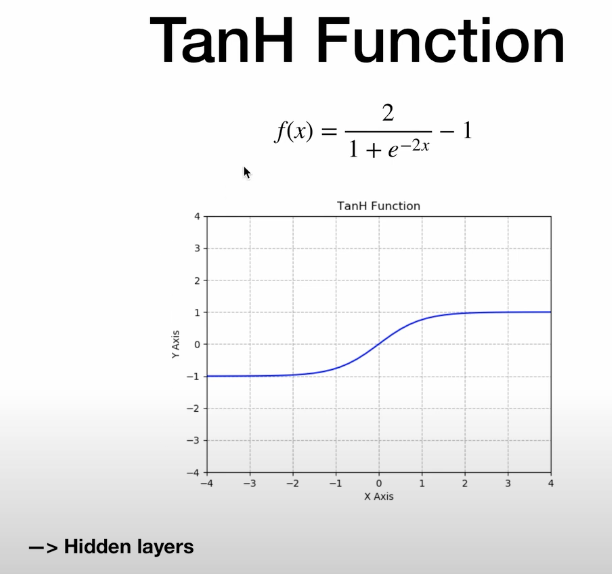
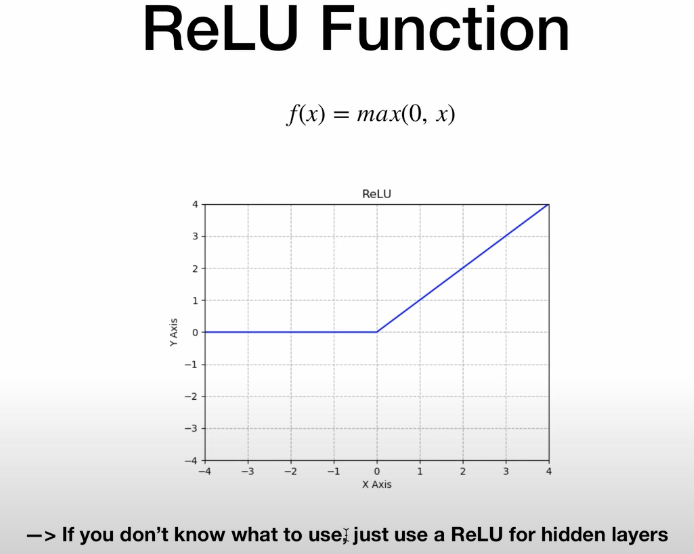
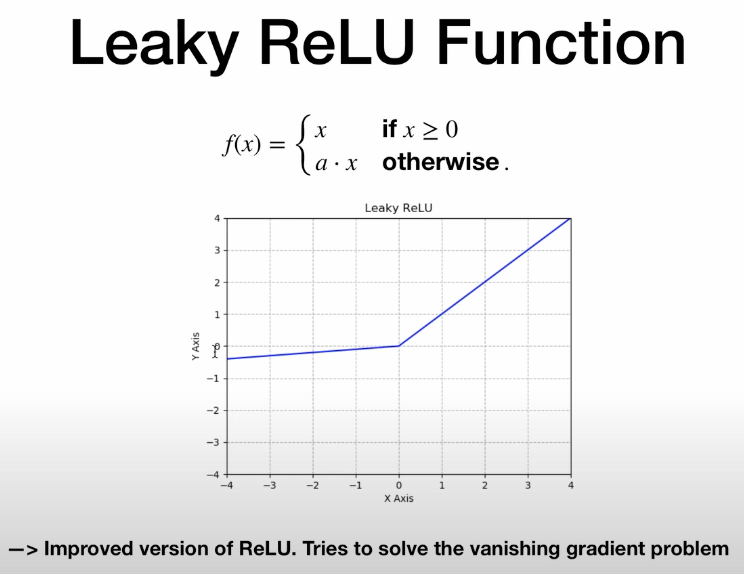
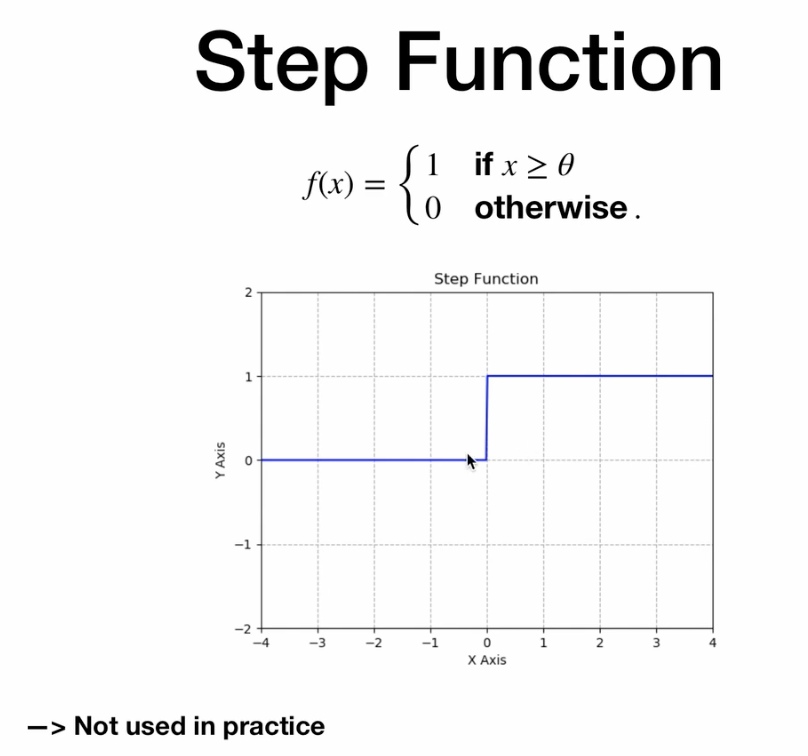

Use Leaky ReLu instead of ReLu when the weights are not updated.

In [118]:
# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0) #First way
print(output)
sm = nn.Softmax(dim=0) #second way
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)


#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# First way 
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() #activation function of ReLu
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid() #activation function of Sigmoid
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# Second way (same output as First way)
# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


# Plot Activation

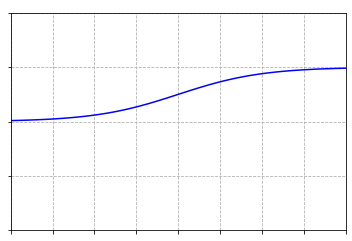

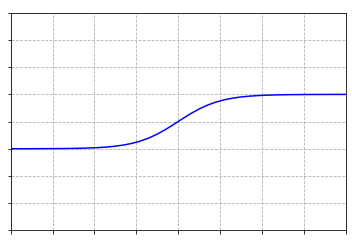

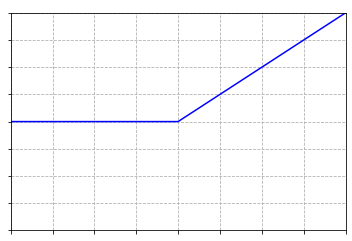

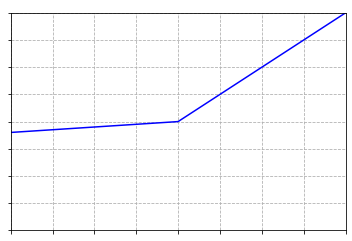

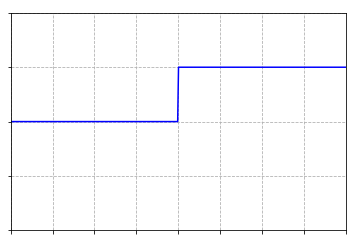

done


In [117]:
import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')

# Feed-Forward Neural Network

torch.Size([100, 1, 28, 28]) torch.Size([100])


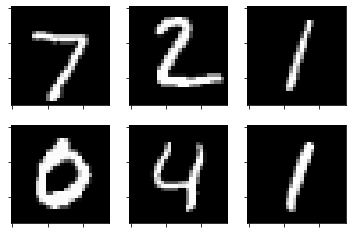

Epoch [1/2], Step [100/600], Loss: 0.3851
Epoch [1/2], Step [200/600], Loss: 0.3990
Epoch [1/2], Step [300/600], Loss: 0.2136
Epoch [1/2], Step [400/600], Loss: 0.3230
Epoch [1/2], Step [500/600], Loss: 0.1333
Epoch [1/2], Step [600/600], Loss: 0.2344
Epoch [2/2], Step [100/600], Loss: 0.0879
Epoch [2/2], Step [200/600], Loss: 0.1267
Epoch [2/2], Step [300/600], Loss: 0.0890
Epoch [2/2], Step [400/600], Loss: 0.2077
Epoch [2/2], Step [500/600], Loss: 0.1601
Epoch [2/2], Step [600/600], Loss: 0.0640
Accuracy of the network on the 10000 test images: 97.11 %


In [122]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, Activation function
# Loss and Optimiser
# Training Loop (batch training)
# Model evaluation
# GPU support

import torch
import torch.nn as nn
import torchvision #for dataset
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt

# Device configuration, using CUDA gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28 (example images have 28 by 28 pixels)
hidden_size = 500 # vary
num_classes = 10
num_epochs = 2 
batch_size = 100
learning_rate = 0.001

# MNIST dataset
# load dataset, transform to tensor format
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
# allocate into number of batch size, and shuffle the data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# convert to iterator
examples = iter(test_loader)
example_data, example_targets = examples.next() # get sample
print(example_data.shape, example_targets.shape) 
# output to torch.Size([100, 1, 28, 28]) --> 100 batches, 1 colour channel, 28 by 28 size arrays
# output to torch.Size([100]) --> 100 labels

# plot sample image
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): #nb: num_classes is output size
        super(NeuralNet, self).__init__()
        self.input_size = input_size #784 size
        self.l1 = nn.Linear(input_size, hidden_size) #500 size
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes) #10 size  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# run model through GPU or CPU
model = NeuralNet(input_size, hidden_size, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


# Train the model
n_total_steps = len(train_loader)
# iterate through epoches
for epoch in range(num_epochs):
    # iterate through batches
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784] because our input size is set to 784 (2-dimension)
        # push to GPU if available
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels) 
        
        # Backward and optimize
        optimizer.zero_grad() #empty value in .grad 
        loss.backward() 
        optimizer.step()
        
        if (i+1) % 100 == 0: #every 100 steps
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

            
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad(): 
    n_correct = 0
    n_samples = 0
    # loop through all batches
    for images, labels in test_loader:
        # reshape and push to GPU if available
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1) #get prediction
        n_samples += labels.size(0) #number of samples in current batch, 100 normally
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

# CNN
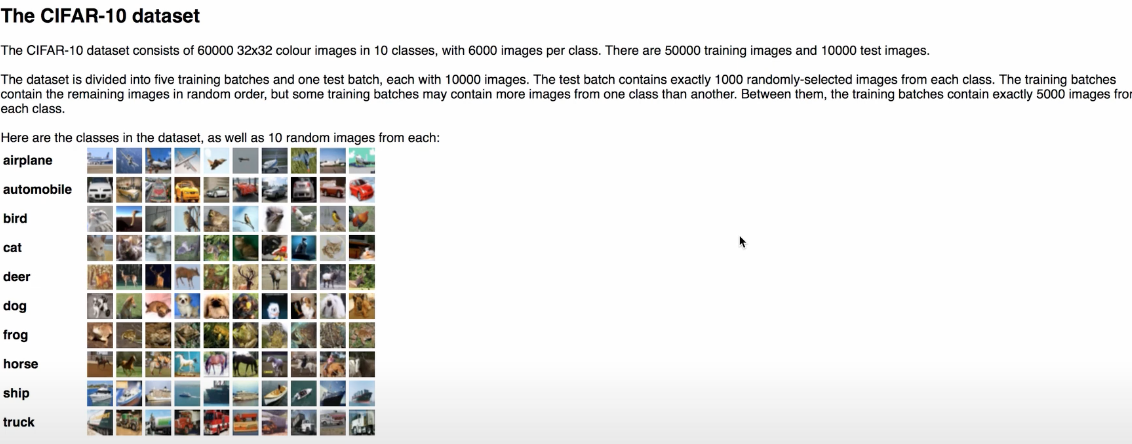
This example uses CIFAR-10 dataset (10 different classes - dog etc)
CNN vs ANN 
- CNN applies convolutional layer (additional pooling layer to learn feutures) with fully connected layer
- Apply filter kernel on initial image (multiply then summing up) to five resulting image
- Give smaller size (can add padding to give correct
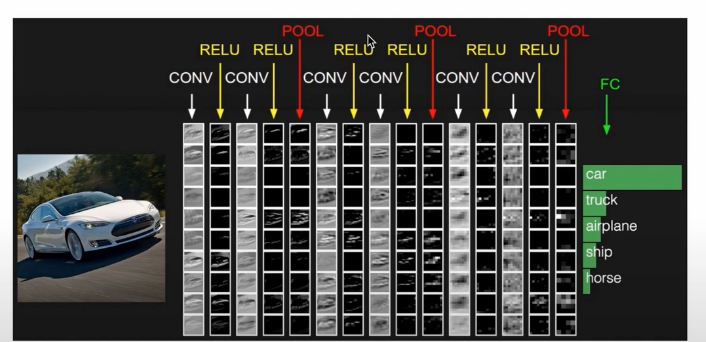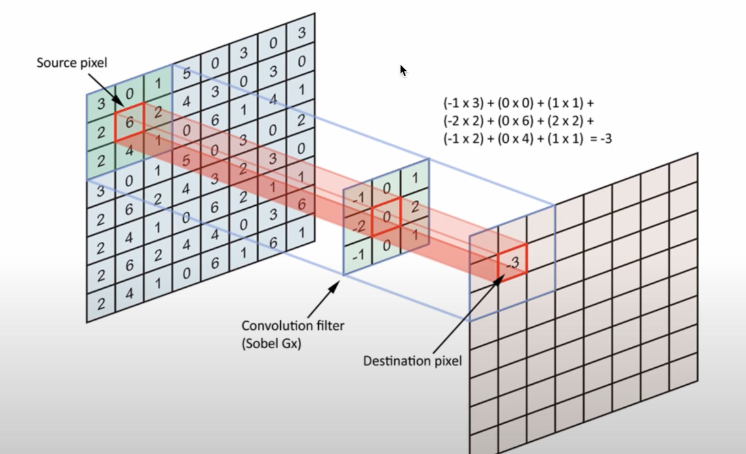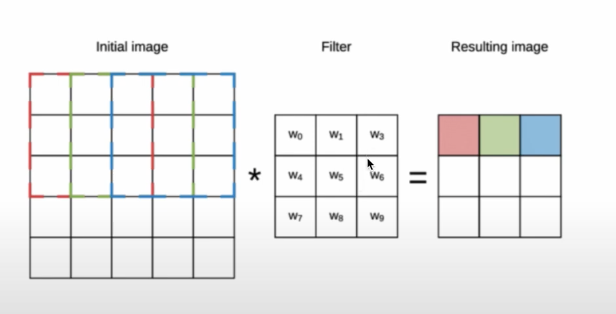
- Or apply Max Pooling to reduce computational (reducing by fixed size) and avoid overfitting
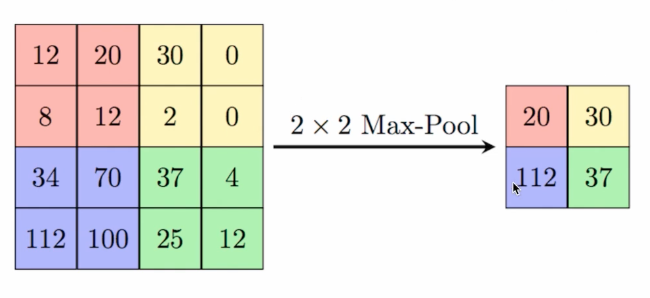

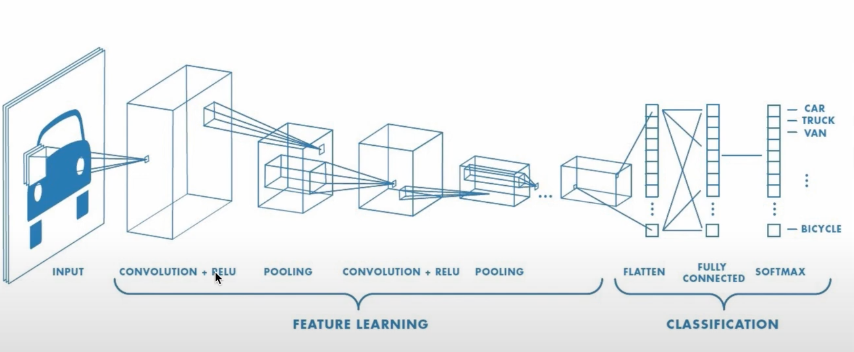
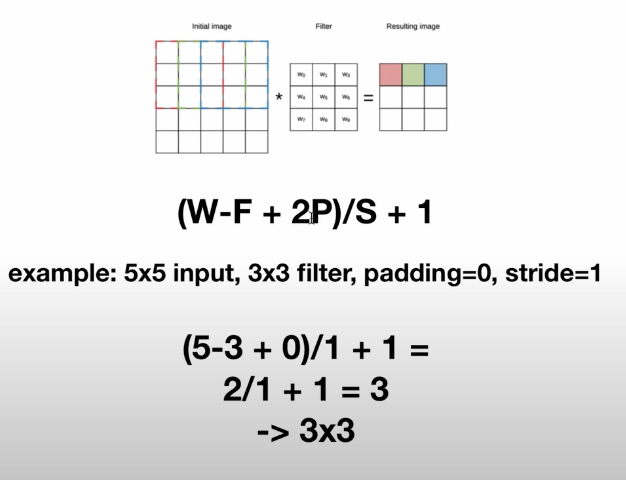

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


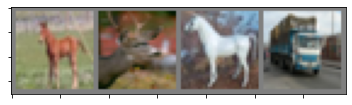

Epoch [1/5], Step [2000/12500], Loss: 2.3187
Epoch [1/5], Step [4000/12500], Loss: 2.3140
Epoch [1/5], Step [6000/12500], Loss: 2.3041
Epoch [1/5], Step [8000/12500], Loss: 2.2195
Epoch [1/5], Step [10000/12500], Loss: 2.2333
Epoch [1/5], Step [12000/12500], Loss: 2.4167
Epoch [2/5], Step [2000/12500], Loss: 2.1252
Epoch [2/5], Step [4000/12500], Loss: 2.1315
Epoch [2/5], Step [6000/12500], Loss: 2.1673
Epoch [2/5], Step [8000/12500], Loss: 2.2274
Epoch [2/5], Step [10000/12500], Loss: 2.0351
Epoch [2/5], Step [12000/12500], Loss: 1.9927
Epoch [3/5], Step [2000/12500], Loss: 1.8266
Epoch [3/5], Step [4000/12500], Loss: 1.5306
Epoch [3/5], Step [6000/12500], Loss: 1.6466
Epoch [3/5], Step [8000/12500], Loss: 1.5947
Epoch [3/5], Step [10000/12500], Loss: 1.3607
Epoch [3/5], Step [12000/12500], Loss: 1.3011
Epoch [4/5], Step [2000/12500], Loss: 0.9816
Epoch [4/5], Step [4000/12500], Loss: 1.4916
Epoch [4/5], Step [6000/12500], Loss: 0.9982
Epoch [4/5], Step [8000/12500], Loss: 1.0431
Epoc

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next() #images shape is [4,3,32,32], 4 batch sizes, 3 colour channels, 

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #3 colour channels, 6 output size, 5 kernel size --> 
        self.pool = nn.MaxPool2d(2, 2) #apply 2 by 2 kernel size
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input matches conv1 output
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 16 input size, multiply by 5 by 5 because 
        self.fc2 = nn.Linear(120, 84) #120 input, 84 output
        self.fc3 = nn.Linear(84, 10) #84 input, 10 output

    def forward(self, x):
        # -> n, 3, 32, 32 --> 4, 3, 32, 32 (batch size is 4, colour channel is 3)
        x = self.pool(F.relu(self.conv1(x)))  # -> after conv 1 (4, 6, 28, 28). after pool (4, 6, 14, 14)
        x = self.pool(F.relu(self.conv2(x)))  # -> after conv 2 (4, 16, 10, 10). after pool (4, 16, 5, 5)
        x = x.view(-1, 16 * 5 * 5)            # -> flatenning (4, 400) 
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    # print accuracy of Network
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    # print accuracy of each class
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

# Transfer Learning
- Re-use model (rapid changes)m, change last layer only without retraining whole model
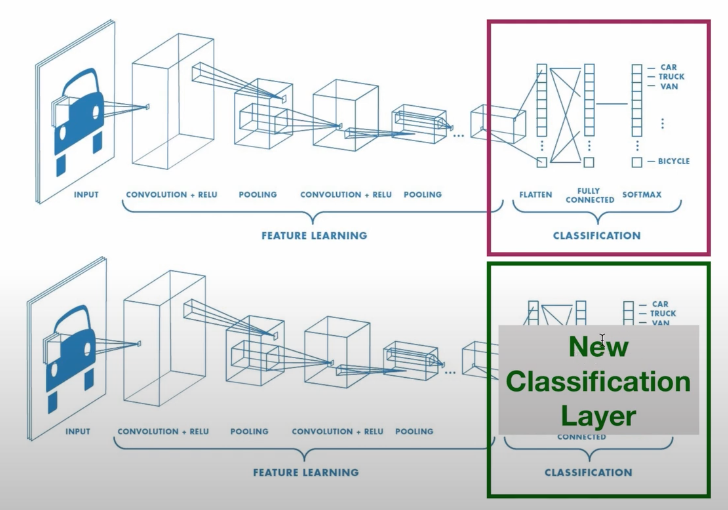

In [ ]:
# ImageFolder
# Scheduler (change learning rate)
# Transfer learning

#Here only 2 classes

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler # 18 layers deep
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

# transfor all data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

# load data
data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes # grab names of classses

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# show pictures
imshow(out, title=[class_names[x] for x in classes])


# specity training model function
def train_model(model, criterion, optimizer, scheduler, num_epochs=2):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# finetune all weights with new data
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True) # preloaded
num_ftrs = model.fc.in_features #number of input features from last layer
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2) #because we only have 2 classes on our data

model = model.to(device)

# calculate loss
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

# update learning rate automatically
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# use function above, to run model
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer, only train last layer
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters(): # freeze all layers in the beginning
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

# TensorBoard
- visualise and analyse our model and pipeline 
- can not run tensorboard in Jupyter Notebook (run in separate script, run in local terminal)
- pip install tensorboard
- tensorboard --logdir=runs
- run local hos
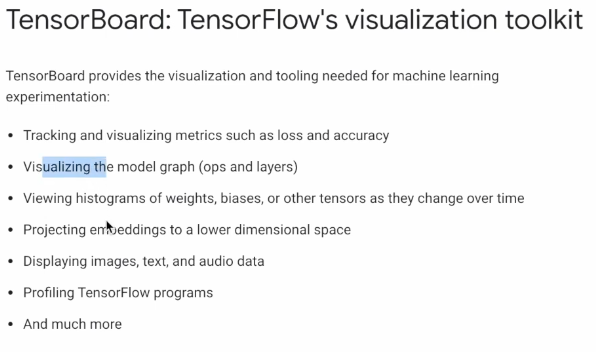
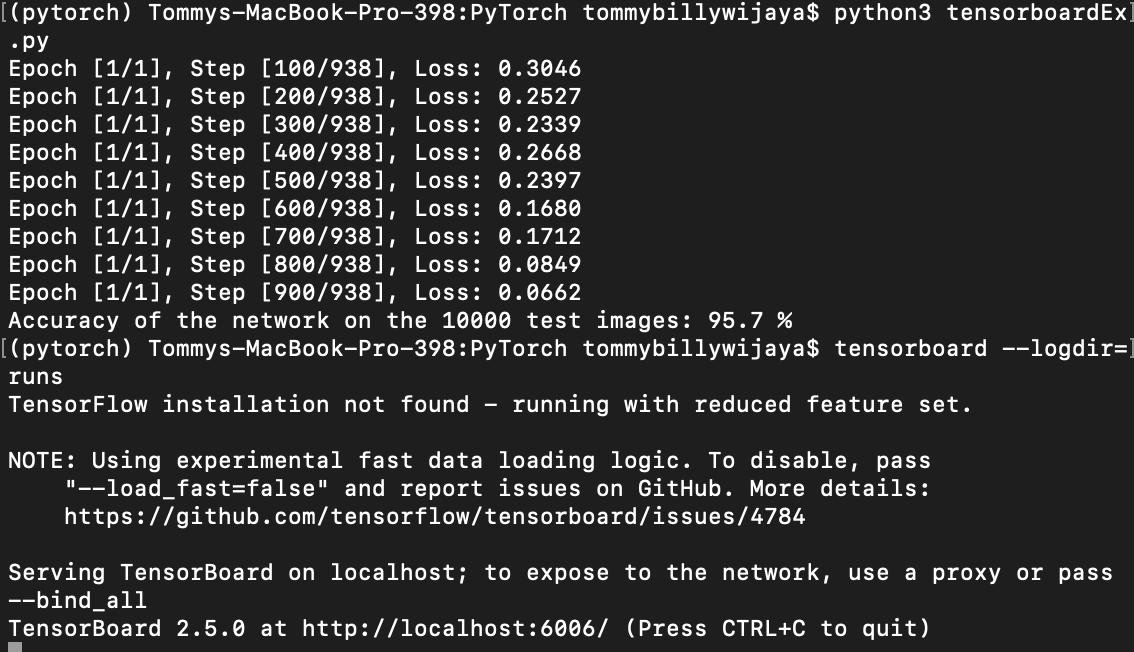
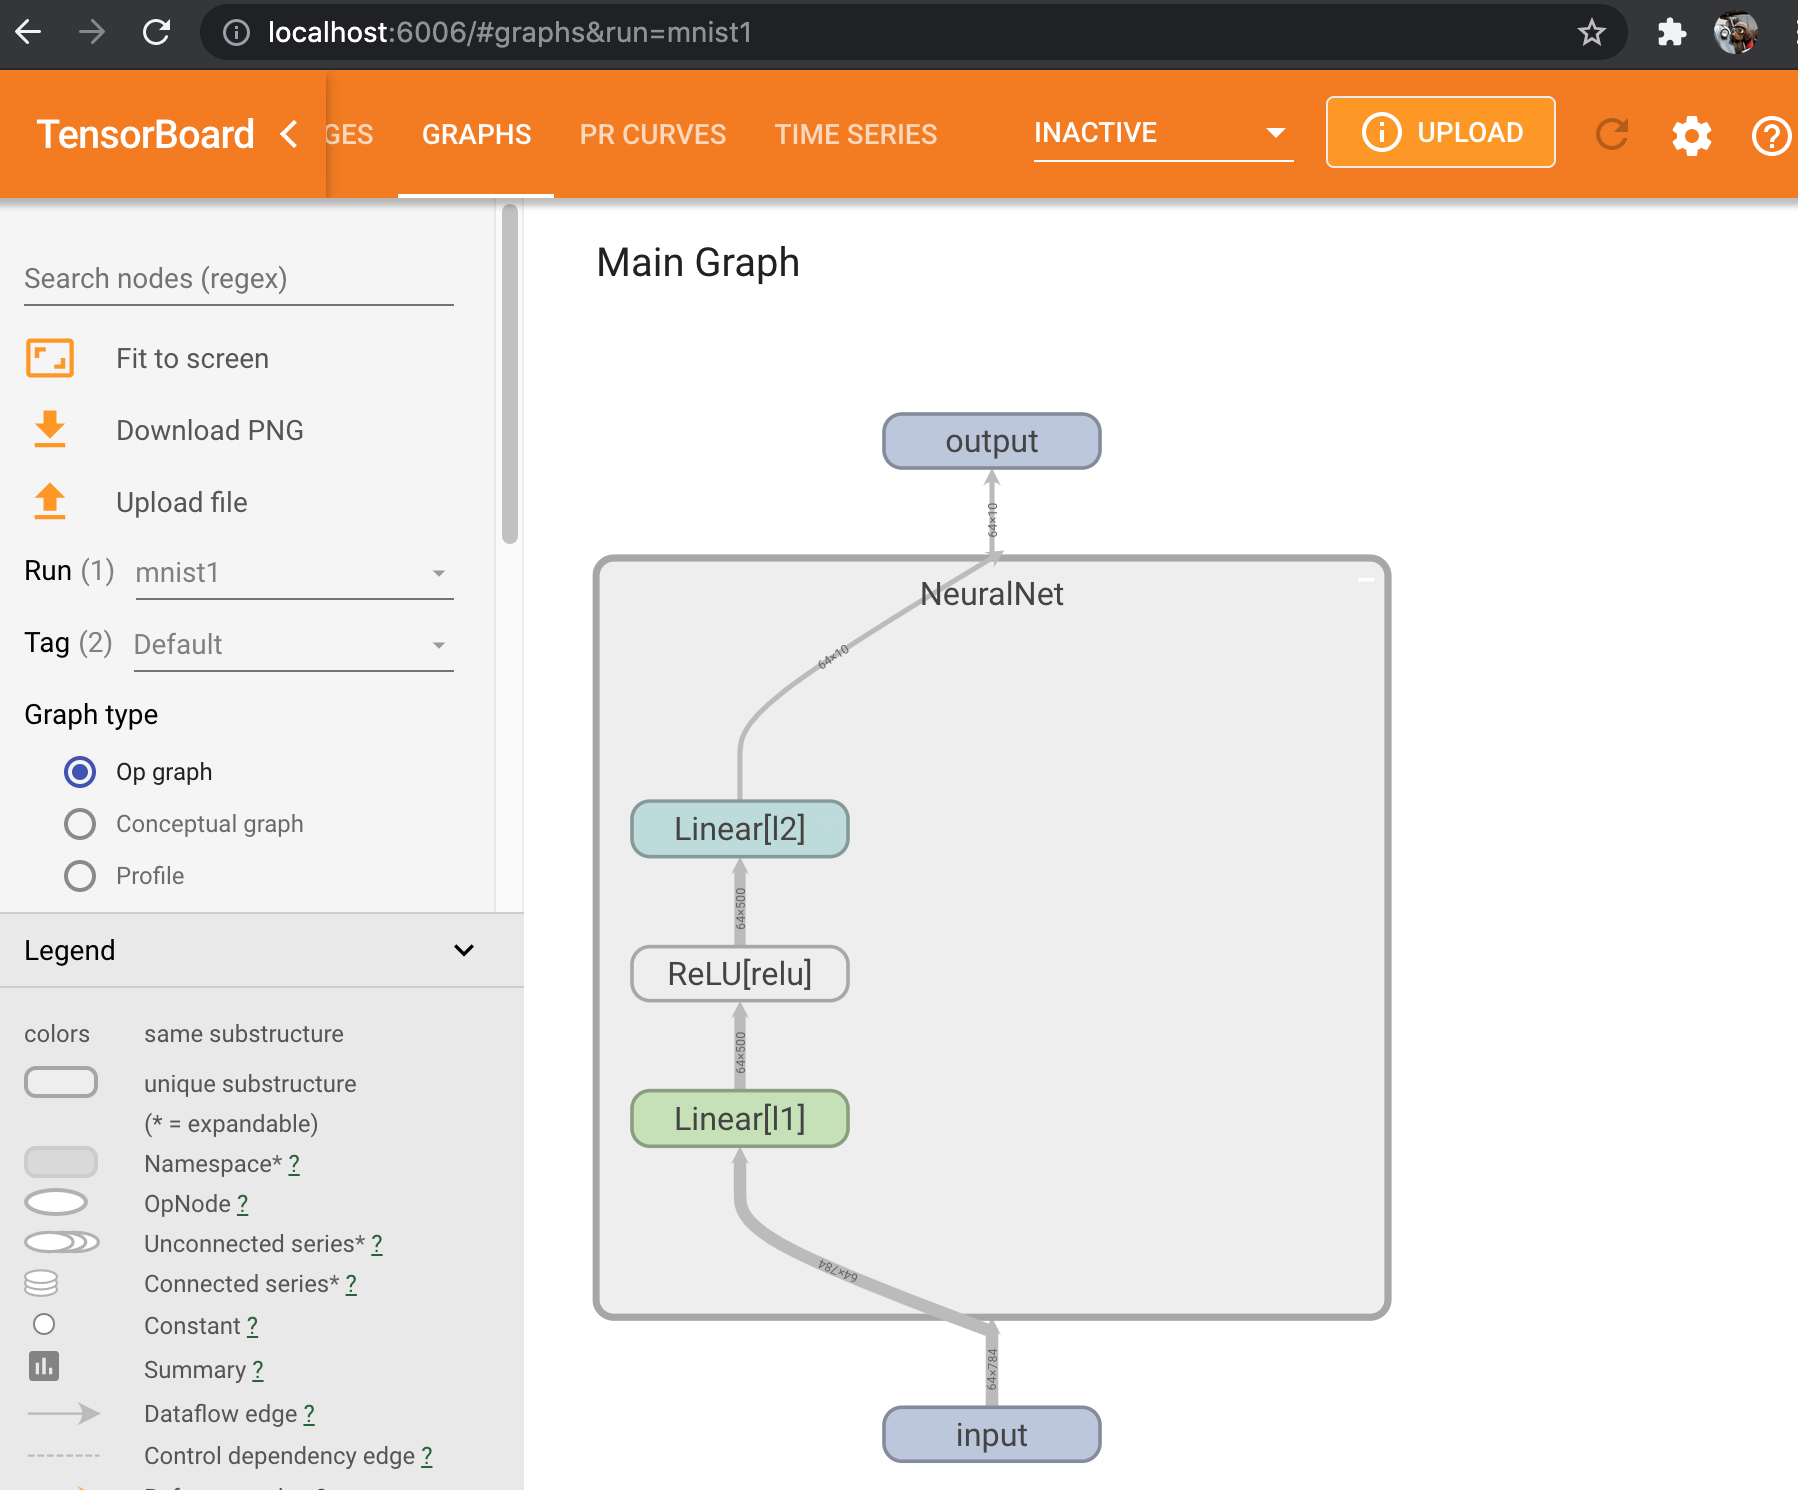

Epoch [1/1], Step [100/938], Loss: 0.3781
Epoch [1/1], Step [200/938], Loss: 0.1597
Epoch [1/1], Step [300/938], Loss: 0.3661
Epoch [1/1], Step [400/938], Loss: 0.2432
Epoch [1/1], Step [500/938], Loss: 0.3732
Epoch [1/1], Step [600/938], Loss: 0.3208
Epoch [1/1], Step [700/938], Loss: 0.0999
Epoch [1/1], Step [800/938], Loss: 0.1677
Epoch [1/1], Step [900/938], Loss: 0.1789
Accuracy of the network on the 10000 test images: 96.3 %


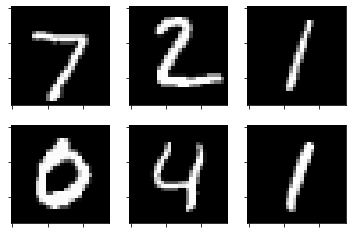

In [126]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()


############## TENSORBOARD ########################
# add image tab
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


############## TENSORBOARD ########################
# add graph tab (check model layers)
writer.add_graph(model, example_data.reshape(-1, 28*28))
#writer.close()
#sys.exit()
###################################################


# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
            ############## TENSORBOARD ########################
            # add training loss, accuracy (every 100 steps), i is current batch
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

            
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        # because in last layer, softmax was not applied, hence apply here to get probability or value between 0 and 1
        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds]) # 10000 by 10 size
    class_labels = torch.cat(class_labels) # 10000 by 1 size

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    # add precision recall curve for each class (labels are binary label for each element)
    classes = range(10) #because digit from 0 to 9 to run through all 10 in class_preds
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

# Saving and Loading Models

In [128]:
import torch
import torch.nn as nn

''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)
# model class must be defined somewhere
model = torch.load(PATH)
model.eval()
# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)
# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

# Create dummy model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model... (not in here!)

In [129]:
# 1 LAZY OPTION
####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.1030,  0.2217,  0.4054,  0.1647, -0.1235,  0.0037]],
       requires_grad=True)
Parameter containing:
tensor([0.3895], requires_grad=True)
Parameter containing:
tensor([[ 0.1030,  0.2217,  0.4054,  0.1647, -0.1235,  0.0037]],
       requires_grad=True)
Parameter containing:
tensor([0.3895], requires_grad=True)


In [133]:
# 2 RECOMMENDED
############save only state dict #########################

# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict()) # save model
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()
    
print(loaded_model.state_dict()) # load model

for param in loaded_model.parameters():
    print(param)
    
###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# E.g. during training, if we want to stop somewhere, and continue later
# create dictionary
checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

# load certain checkpoint
checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state']) #load all parameters
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch'] 

# can continue training
model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

OrderedDict([('linear.weight', tensor([[ 0.1030,  0.2217,  0.4054,  0.1647, -0.1235,  0.0037]])), ('linear.bias', tensor([0.3895]))])
OrderedDict([('linear.weight', tensor([[ 0.1030,  0.2217,  0.4054,  0.1647, -0.1235,  0.0037]])), ('linear.bias', tensor([0.3895]))])
Parameter containing:
tensor([[ 0.1030,  0.2217,  0.4054,  0.1647, -0.1235,  0.0037]],
       requires_grad=True)
Parameter containing:
tensor([0.3895], requires_grad=True)
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}


In [131]:
""" SAVING ON GPU/CPU 
# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))
# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)
# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!
# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)
device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)
# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""

' SAVING ON GPU/CPU \n# 1) Save on GPU, Load on CPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\ndevice = torch.device(\'cpu\')\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location=device))\n# 2) Save on GPU, Load on GPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.to(device)\n# Note: Be sure to use the .to(torch.device(\'cuda\')) function \n# on all model inputs, too!\n# 3) Save on CPU, Load on GPU\ntorch.save(model.state_dict(), PATH)\ndevice = torch.device("cuda")\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want\nmodel.to(device)\n# This loads the model to a given GPU device. \n# Next, be sure to call model.to(torch.device(\'cuda\')) to convert the model’s parameter tensors to CUDA tensors\n'